<a href="https://colab.research.google.com/github/itumor/colab/blob/master/trending_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Trending Stock Prediction**

In [1]:
from datetime import datetime
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [2]:
stock ='AAPL'
startdate = '1900-01-01'
enddate = datetime.today().strftime('%Y-%m-%d')

In [3]:
df = web.DataReader(stock, data_source='yahoo',start = startdate, end = enddate)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,0.128906,0.128348,0.128348,0.128348,469033600.0,0.101261
1980-12-15,0.122210,0.121652,0.122210,0.121652,175884800.0,0.095978
1980-12-16,0.113281,0.112723,0.113281,0.112723,105728000.0,0.088934
1980-12-17,0.116071,0.115513,0.115513,0.115513,86441600.0,0.091135
1980-12-18,0.119420,0.118862,0.118862,0.118862,73449600.0,0.093777
...,...,...,...,...,...,...
2020-09-24,110.250000,105.000000,105.169998,108.220001,167743300.0,108.220001
2020-09-25,112.440002,107.669998,108.430000,112.279999,149981400.0,112.279999
2020-09-28,115.320000,112.779999,115.010002,114.959999,137672400.0,114.959999


In [4]:
df.shape

(10035, 6)

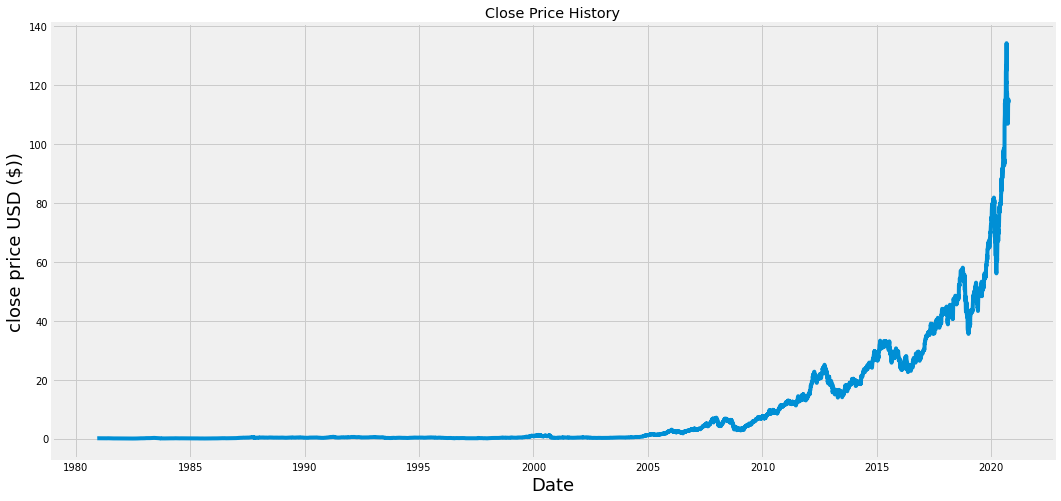

In [5]:

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('close price USD ($))', fontsize=18)
plt.show()


In [6]:
#data = df
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*.8)


training_data_len



8028

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))

scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[5.90774260e-04],
       [5.40849645e-04],
       [4.74283565e-04],
       ...,
       [8.56707174e-01],
       [8.50220952e-01],
       [8.59540208e-01]])

In [8]:
train_data = scaled_data[0:training_data_len , :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 60 :
    print(x_train)
    print(y_train)
    print()

[array([0.00059077, 0.00054085, 0.00047428, 0.00049509, 0.00052005,
       0.00057413, 0.0006199 , 0.0006615 , 0.00071559, 0.00081543,
       0.00083208, 0.00080295, 0.00076967, 0.00078215, 0.00075719,
       0.00070726, 0.0006615 , 0.0006407 , 0.00069478, 0.00068646,
       0.00064902, 0.00065318, 0.00067398, 0.00066566, 0.00072807,
       0.00069478, 0.00071559, 0.00072807, 0.00072391, 0.00070726,
       0.00069894, 0.00066566, 0.00062822, 0.00057413, 0.00052005,
       0.00055333, 0.00058661, 0.00058661, 0.00059077, 0.00054085,
       0.00054085, 0.00051173, 0.00050341, 0.0004826 , 0.00050341,
       0.00054085, 0.00048676, 0.000441  , 0.00045348, 0.00042436,
       0.00047428, 0.00048676, 0.00051589, 0.00052005, 0.00050757,
       0.00049925, 0.00049509, 0.00048676, 0.0004202 , 0.00038276])]
[0.0003536324493550665]



In [9]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(7968, 60, 1)

In [11]:
#model = Sequential()
#model.add(LSTM(100, return_sequences=True, input_shape= (x_train.shape[1], 1)))
#model.add(LSTM(100, return_sequences= False))
#model.add(Dense(50))
#model.add(Dense(1))

In [12]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [13]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics='accuracy' )


In [14]:
rmse= 100
while ( rmse >= 1):     
  model.fit(x_train, y_train, validation_data=(x_train, y_train) ,batch_size=100 , epochs=1)
  test_data = scaled_data[training_data_len - 60: , :]
  x_test = []
  y_test = dataset[training_data_len:, :]
  for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
  y_test.size
  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1 ))
  Predictions = model.predict(x_test)
  Predictions = scaler.inverse_transform(Predictions)
  rmse=np.sqrt(np.mean(((Predictions- y_test)**2)))
  rmse

80/80 [==============================] - 9s 108ms/step - loss: 5.9690e-07 - accuracy: 1.2550e-04 - val_loss: 5.3112e-07 - val_accuracy: 1.2550e-04


In [15]:
#acc_callback = AccuracyStopping(0.05)
#model.fit(x_train, y_train, validation_data=(x_train, y_train) ,batch_size=1 , epochs=10)
#model.fit(x_train, y_train, batch_size=1000, epochs=1000)

In [16]:
#model.fit(x_train, y_train, batch_size=1, epochs=100)
#model.fit(x_train, y_train, batch_size=1, epochs=100)

In [17]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

y_test.size
 



2007

In [18]:
x_test = np.array(x_test)


In [19]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1 ))


In [20]:
#Prediction 
Predictions = model.predict(x_test)
Predictions = scaler.inverse_transform(Predictions)

In [21]:
rmse=np.sqrt(np.mean(((Predictions- y_test)**2)))
rmse

0.9965206183312054

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


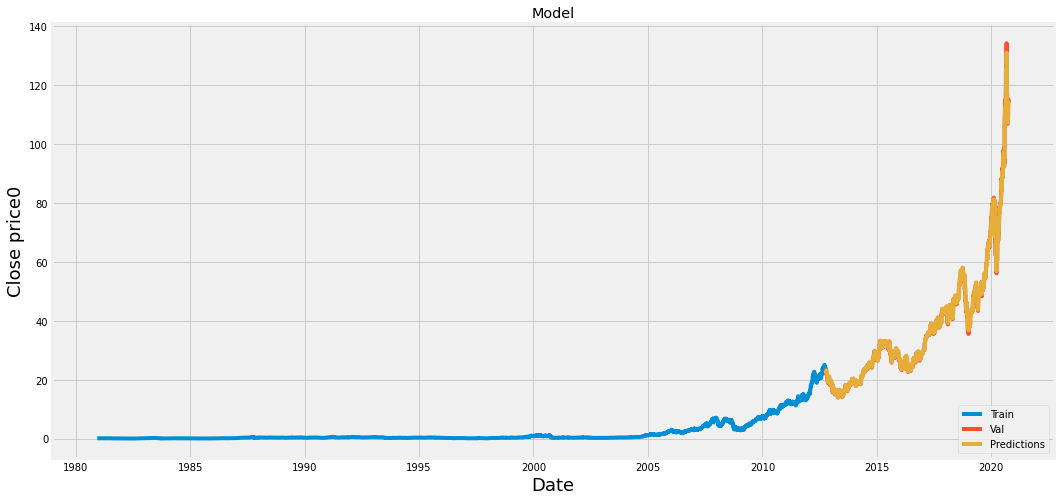

In [22]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = Predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18 )
plt.ylabel('Close price0' , fontsize=18 )
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val','Predictions'], loc='lower right')
plt.show()


In [23]:
valid

,Close,Predictions
Date,,
2012-10-09,22.708929,23.099384
2012-10-10,22.889643,22.824486
2012-10-11,22.432142,22.883673
2012-10-12,22.489643,22.662462
2012-10-15,22.670000,22.594812
...,...,...
2020-09-24,108.220001,108.084206
2020-09-25,112.279999,107.523788
2020-09-28,114.959999,110.217865


In [24]:

stock_qoute = web.DataReader(stock, data_source='yahoo',start = startdate, end = enddate)

new_df = stock_qoute.filter(['Close'])
last_60_days = new_df[-60:].values

last_60_days_scaled = scaler.transform(last_60_days)

x_test = [ ]
x_test.append(last_60_days_scaled)

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))

pred_price= model.predict(x_test)

pred_price = scaler.inverse_transform(pred_price)

print(pred_price)


[[115.08669]]


In [25]:
stock_qoute2 = web.DataReader(stock, data_source='yahoo',start = startdate, end = enddate)
print(stock_qoute2['Close'])

Date
1980-12-12      0.128348
1980-12-15      0.121652
1980-12-16      0.112723
1980-12-17      0.115513
1980-12-18      0.118862
                 ...    
2020-09-24    108.220001
2020-09-25    112.279999
2020-09-28    114.959999
2020-09-29    114.089996
2020-09-30    116.032204
Name: Close, Length: 10035, dtype: float64
